In [1]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

import copy

In [2]:
image = imread('lenaNoise.png')
image

array([[255,   0,  90, ..., 159,  44,  83],
       [182, 255, 255, ..., 255, 114, 255],
       [179,   0,  31, ..., 249, 187,  18],
       ...,
       [  0,   0,  56, ..., 152,  71, 185],
       [  0, 108,   0, ...,   0,  70,   0],
       [  0,  95,   0, ..., 207,   0,   0]], dtype=uint8)

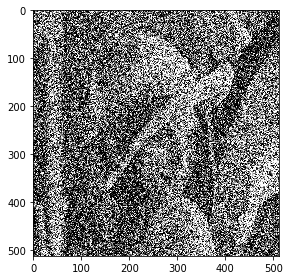

In [3]:
imshow(image)

c:\users\student\appdata\local\programs\python\python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


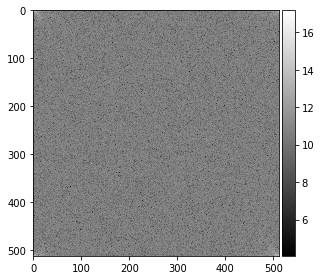

In [4]:
fourier_image = np.fft.fft2(image)
imshow(np.log(abs(fourier_image)), cmap='gray')

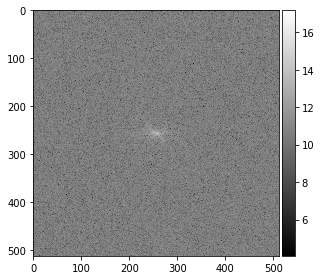

In [5]:
fourier_image_shifted = np.fft.fftshift(fourier_image)
imshow(np.log(abs(fourier_image_shifted)), cmap='gray')

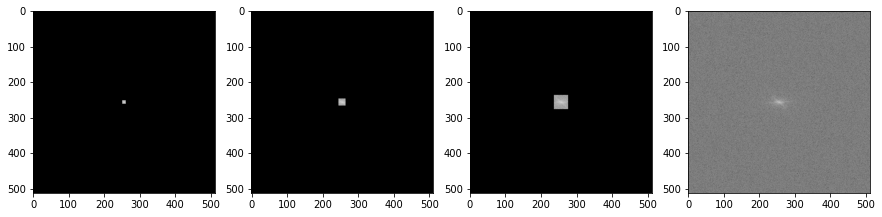

In [6]:
def LPFilter(size, image):
    blank_image = np.zeros((image.shape[0],image.shape[1]))
    acceptable = list(range(int(image.shape[0]/2 - size/2), int(image.shape[0]/2 + size/2)))
    for r in acceptable:
        for c in acceptable:
            blank_image[r][c] = 1
    return blank_image

fig, ax = plt.subplots(1,4, figsize=(15, 15))
size_10_filter = LPFilter(10, fourier_image_shifted) * fourier_image_shifted
size_20_filter = LPFilter(20, fourier_image_shifted) * fourier_image_shifted
size_40_filter = LPFilter(40, fourier_image_shifted) * fourier_image_shifted
size_512_filter = LPFilter(512, fourier_image_shifted) * fourier_image_shifted

ax[0].imshow(np.log(1+abs(size_10_filter)), cmap='gray')
ax[1].imshow(np.log(1+abs(size_20_filter)), cmap='gray')
ax[2].imshow(np.log(1+abs(size_40_filter)), cmap='gray')
ax[3].imshow(np.log(1+abs(size_512_filter)), cmap='gray')
            

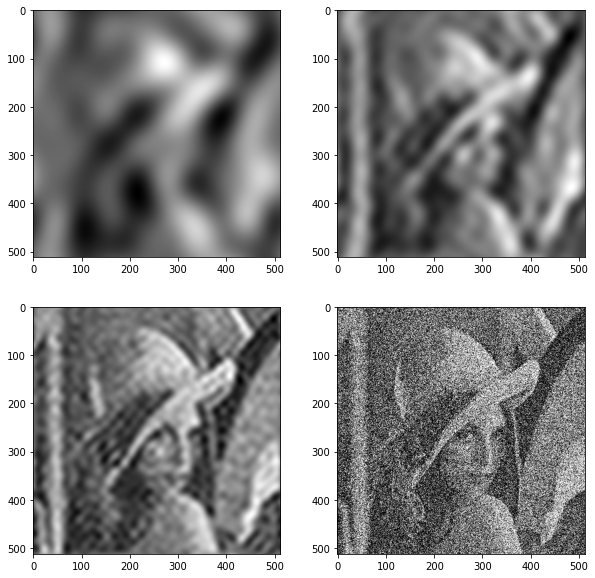

In [7]:
inverse_10_filter = np.fft.ifft2(np.fft.ifftshift(size_10_filter))
inverse_20_filter = np.fft.ifft2(np.fft.ifftshift(size_20_filter))
inverse_40_filter = np.fft.ifft2(np.fft.ifftshift(size_40_filter))
inverse_512_filter = np.fft.ifft2(np.fft.ifftshift(size_512_filter))


fig, ax = plt.subplots(2,2, figsize=(10, 10))

ax[0][0].imshow(abs(inverse_10_filter), cmap='gray')
ax[0][1].imshow(abs(inverse_20_filter), cmap='gray')
ax[1][0].imshow(abs(inverse_40_filter), cmap='gray')
ax[1][1].imshow(abs(inverse_512_filter), cmap='gray')


In [23]:
sum_dict = {0: 0, 1: 1}

def sum_up_to(num):
    if sum_dict.get(num, -1) == -1:
        ret = sum_up_to(num-1)+num
        sum_dict[num] = ret
        return ret
    else:
        return sum_dict.get(num)
    

def solve(arr):
    h = len(arr)
    arr = list(arr)
    total_count = 0
    i = 0
    temp_count = 0
    while i < h:
        if arr[i] == "1":
            break
        else:
            temp_count += 1
        i += 1
        
    total_count += sum_up_to(temp_count)
    temp_count = 0
    i += 1
    while i < h:
        if arr[i] == "1" and arr[i-1] != "1":
            total_count += 2 * sum_up_to(int(temp_count/2))
            if temp_count%2 == 1:
                total_count+=(int(temp_count)/2 +1)
            temp_count=0
        elif arr[i] == "0":
            temp_count += 1
        i+=1
    
    total_count += sum_up_to(temp_count)
    
    return total_count
solve("100000000000000011010111100111110000")

79.5